In [ ]:
!pip install psycopg[binary]


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.8/212.8 kB 6.7 MB/s eta 0:00:00


all-in-one code

/tmp/ipython-input-3373802325.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Unique CNS cell lines: 34
cell_line
SW1088       1362
ONS76        1361
T98G         1355
KNS42        1351
DBTRG05MG    1342
LN229        1331
KALS1        1329
GB1          1328
U118MG       1321
GOS3         1305
Name: count, dtype: int64
Selected cell line B: SW1088, N=1362


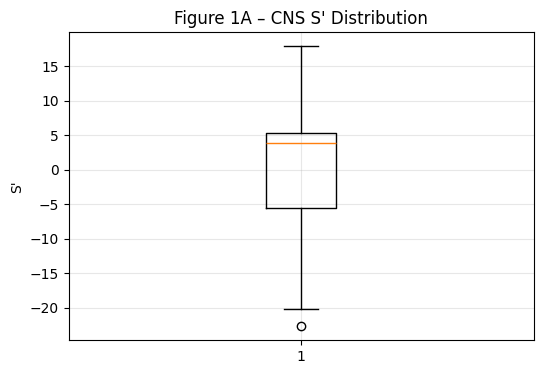

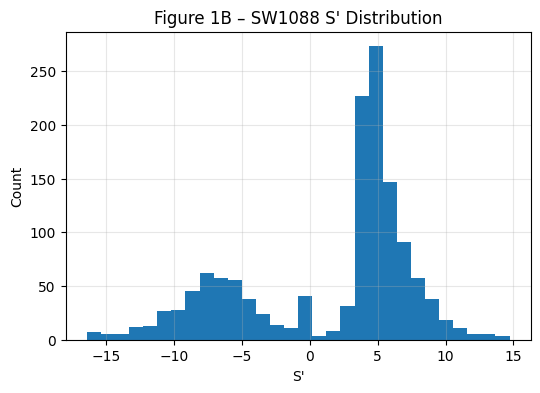

In [ ]:
# Figure 1 Reproduction Notebook, jeong shin


# IMPORTS
import pandas as pd
import matplotlib.pyplot as plt
import psycopg

# CONNECT , LOAD DATA
conn = psycopg.connect(
    dbname="**",
    user="**",
    password="**,
    host="**",
    port="**"
)

query = """
SELECT id, depmap_id, ccle_name, s_prime
FROM public.im_sprime_solved_s_prime;
"""

df = pd.read_sql(query, conn)
conn.close()


# PROCESS ; derive cell_line / tissue

split = df['ccle_name'].str.split('_', n=1, expand=True)
df['cell_line'] = split[0]
df['tissue'] = split[1]

# Filter CNS rows
A = df[df['tissue'] == 'CENTRAL_NERVOUS_SYSTEM']

print("Unique CNS cell lines:", A['cell_line'].nunique())
print(A['cell_line'].value_counts().head(10))

# Choose cell line B
cell_line_B = A['cell_line'].value_counts().idxmax()  # most common line as placeholder
B = A[A['cell_line'] == cell_line_B]

print(f"Selected cell line B: {cell_line_B}, N={len(B)}")


# VISUALIZE ; Recreate Figure 1A & 1B

## Figure 1A — Full CNS S' distribution
plt.figure(figsize=(6,4))
plt.boxplot(A['s_prime'].dropna(), vert=True)
plt.title("Figure 1A – CNS S' Distribution")
plt.ylabel("S'")
plt.grid(alpha=0.3)
plt.show()

## Figure 1B — Single cell line S' distribution
plt.figure(figsize=(6,4))
plt.hist(B['s_prime'].dropna(), bins=30)
plt.title(f"Figure 1B – {cell_line_B} S' Distribution")
plt.xlabel("S'")
plt.ylabel("Count")
plt.grid(alpha=0.3)
plt.show()


